In [1]:
import tensorflow as tf

In [192]:
from tensorflow.examples.tutorials.mnist import input_data

In [193]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [194]:
df=input_data.read_data_sets('/tem/data',one_hot=True)

Extracting /tem/data\train-images-idx3-ubyte.gz
Extracting /tem/data\train-labels-idx1-ubyte.gz
Extracting /tem/data\t10k-images-idx3-ubyte.gz
Extracting /tem/data\t10k-labels-idx1-ubyte.gz


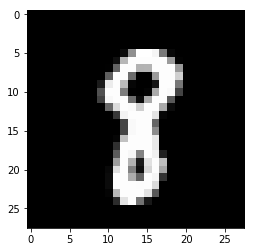

In [195]:
for i in range(10):
                   plt.imshow(df.train.images[np.random.randint(0,50000,1)].reshape(28,28),cmap='gray')
                    # Wait for 5 seconds
                   time.sleep(0.1)

In [196]:
type(df)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [197]:
learning_rate=0.01
traininf_epochs =15
batch_size=100 # 100 data sample(images )


In [198]:
n_classes =10 # possible number [0,1,2,3....10]

In [199]:
#no of sample
n_sample = df.train.num_examples
n_sample

55000

In [200]:
n_input =len(df.train.images[1])
n_input

784

In [201]:
n_hidden_1= 256
n_hidden_2= 256

In [249]:
def multilayer_percepton(x,weight,biases):
    '''
    x: placeholder for input data
    weight:dictionary of weight
    biases: dictionary of biases    
    '''
    #with REFU(Rectified Linear Unit) ACTIVATION FUNCTION 
    # first hidden layer
    # X*W+b
    layer1 = tf.add(tf.matmul(x,weight['h1']),biases['b1'])
    # pass to REFU function 
    #REFU(x*w+b)-->max(0,x)
    layer1=tf.nn.relu(layer1)
    # 2nd hidden layer
    layer2 = tf.add(tf.matmul(layer1,weight['h2']),biases['b2'])
    layer2 = tf.nn.relu(layer2)
    
    #(output layer)
    layer_out=tf.add(tf.matmul(layer2,weight['out']),biases['out'])
    #layer_out = tf.nn.sigmoid(layer_out)
    return layer_out

In [250]:
weight={
    'h1':tf.Variable(tf.random_normal(shape=[n_input,n_hidden_1])),
    
    'h2':tf.Variable(tf.random_normal(shape=[n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal(shape=[n_hidden_2,n_classes]))   
}

In [251]:
biases ={
      'b1':tf.Variable(tf.random_normal(shape=[n_hidden_1])),
       'b2':tf.Variable(tf.random_normal(shape=[n_hidden_2])),
      'out':tf.Variable(tf.random_normal(shape=[n_classes]))   
}

In [252]:
X = tf.placeholder(dtype=tf.float32,shape=[None,n_input])
y =tf.placeholder(dtype=tf.float32,shape=[None,n_classes])

In [253]:
pred  =multilayer_percepton(X,weight,biases)
pred

<tf.Tensor 'Add_50:0' shape=(?, 10) dtype=float32>

In [254]:
#optmizer

In [255]:
cost  = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=pred))

In [256]:
optimization = tf.train.AdadeltaOptimizer(learning_rate=learning_rate,epsilon=traininf_epochs).minimize(cost)

# Traning Model

In [257]:
t=df.train.next_batch(10) # 10  sample image

In [258]:
Xsamp ,ysamp =t

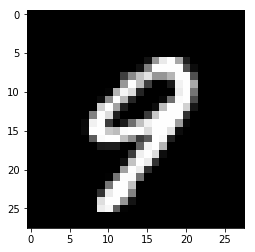

In [259]:
plt.imshow(Xsamp[0].reshape(28,28),cmap='gray')

In [260]:
ysamp[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

# Run session

In [261]:
#keep session alive for all cell
sess = tf.InteractiveSession()

C:\Users\negi\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [262]:
init =  tf.global_variables_initializer()

In [263]:
sess.run(init)

In [264]:
for epoch in range(traininf_epochs):
    #avg cost
    avg_cost =0.0
    
    #total_batch
    total_batch = np.int(n_sample/batch_size)
    for i in range(total_batch):
        #batches
        x_btach,y_btach = df.train.next_batch(batch_size)
        _,c=sess.run([optimization,cost],feed_dict={X:x_btach,y:y_btach})
        avg_cost+=c/batch_size
    print("Epoch: {} , cost {} ".format(epoch+1,c))

    
print('complted traning on {} epochs'.format(epoch+1))
    
    

Epoch: 1 , cost 17.34724998474121 
Epoch: 2 , cost 10.41332721710205 
Epoch: 3 , cost 4.378308296203613 
Epoch: 4 , cost 4.730423450469971 
Epoch: 5 , cost 4.691118240356445 
Epoch: 6 , cost 7.746694564819336 
Epoch: 7 , cost 3.76467227935791 
Epoch: 8 , cost 2.579737663269043 
Epoch: 9 , cost 3.2503914833068848 
Epoch: 10 , cost 0.52813321352005 
Epoch: 11 , cost 1.820401906967163 
Epoch: 12 , cost 0.7726476192474365 
Epoch: 13 , cost 2.8916451930999756 
Epoch: 14 , cost 1.9543201923370361 
Epoch: 15 , cost 0.00016270976630039513 
complted traning on 15 epochs


In [265]:
corr_pred = tf.equal(tf.math.argmax(pred,1),tf.math.argmax(y,1))

In [266]:
corr_pred = tf.cast(corr_pred,'float')
corr_pred


<tf.Tensor 'Cast_7:0' shape=(?,) dtype=float32>

In [314]:
acurracy.eval(feed_dict={X:df.test.images,y:df.test.labels})

0.9327

#  Manually test.

In [444]:
# RANDOM SIZE VALIDATION INPUT WITH SEED (DEED VALUE IS RANDOM )

import numpy as np
np.random.seed(np.random.randint(0,10000,1))

start=int(np.random.randint(0,4000,1));

end=int(4000+np.random.randint(0,1000,1))
a=df.validation.images[start:end]
b=df.validation.labels[start:end]
end-start


3865

In [445]:
a.shape

(3865, 784)

In [446]:
df.validation.images.shape

(5000, 784)

In [447]:
acurracy = tf.reduce_mean(corr_pred)

In [448]:
acurracy.eval(feed_dict={X:a,y:b})

0.9379043

In [278]:
acurracy.eval(feed_dict={X:df.test.images,y:df.test.labels})

0.9327


   # df.test

In [449]:
X=df.test.images
test_result  =multilayer_percepton(X,weight,biases)

In [450]:
test_result

<tf.Tensor 'Add_53:0' shape=(10000, 10) dtype=float32>

In [451]:
sess.run(test_result[1])

array([ 316.08887,  193.31738,  576.00885,  413.4981 , -123.94763,
        259.684  ,   68.23399, -250.99779,  557.7376 ,  -86.18908],
      dtype=float32)

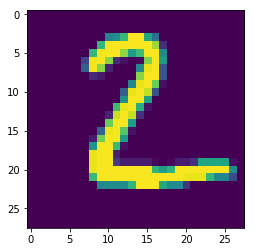

In [452]:
plt.imshow(df.test.images[1].reshape(28,28))

In [453]:
# max index in row 
sess.run(tf.math.reduce_max(tf.nn.relu(test_result),axis=1))

array([ 546.1723 ,  576.00885,  412.6695 , ...,  685.0626 ,  857.8778 ,
       1077.8533 ], dtype=float32)

In [454]:
#max value index(along row )
sess.run(tf.math.argmax(tf.nn.relu(test_result),axis=1))

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [455]:
sess.run(tf.nn.relu(test_result))

array([[  0.      ,   0.      ,  71.55201 , ..., 546.1723  ,   0.      ,
        303.14896 ],
       [316.08887 , 193.31738 , 576.00885 , ...,   0.      , 557.7376  ,
          0.      ],
       [  0.      , 412.6695  ,  80.80324 , ..., 216.60426 , 104.443886,
          0.      ],
       ...,
       [  0.      ,   0.      ,   0.      , ..., 110.35954 , 307.46722 ,
        345.4539  ],
       [ 39.599182,  44.08604 ,  23.170294, ...,   0.      , 332.21906 ,
          0.      ],
       [192.64108 ,   0.      ,  86.46562 , ...,   0.      ,   0.      ,
        376.70218 ]], dtype=float32)

In [456]:
sess.run(tf.nn.relu(-0.199))

0.0